# Titanic

Fontes: 
 - https://www.kaggle.com/alexmaszanski/titanic-simple-eda-for-beginners

- https://www.kaggle.com/startupsci/titanic-data-science-solutions

- Harrison, Matt. Machine Learning – Guia de Referência Rápida. Novatec Editora. 






#__The Challenge__


The sinking *(naufrágio)* of the Titanic is one of the most infamous shipwrecks *(nalfrágio)* in history.

On April 15, 1912, during her maiden voyage, the widely *(amplamente)* considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the __death of 1502 out of 2224 passengers and crew__.

While there was some element of luck involved in surviving, ***it seems some groups of people were more likely to survive than others.***

In this challenge, we ask you to build a predictive model that answers the question: __“what sorts of people were more likely to survive?”__ using passenger data (ie name, age, gender, socio-economic class, etc).



## Importando as bibliotecas e dataset

interpretar corretamente os coeficientes de regressão logística

In [1]:
# Analise de dados e preparação de base
import pandas as pd
import numpy as np
import random as rnd

#Visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning

__Comentários usados:__
- Combine dados de treinamento e teste para determinadas operações, como a conversão de campos do dataset em valores numéricos.

- Quase 30% dos passageiros tinham irmãos e / ou cônjuges a bordo.

- interpretar corretamente os coeficientes de regressão logística.


### Dicionário de dados

- __PassengerId:__ Número de identificação do passageiro
- __Survived:__ Informa se o passageiro sobreviveu ao desastre
  - 0 = Não
  - 1 = Sim
- __Pclass:__ Classe do bilhete
  - 1 = 1ª Classe
  - 2 = 2ª Classe
  - 3 = 3ª Classe
- __Name:__ Nome do passageiro
- __Sex:__ Sexo do passageiro
- __Age:__ Idade do passageiro
- __SibSp:__ Quantidade de cônjuges e irmãos a bordo
- __Parch:__ Quantidade de pais e filhos a bordo
- __Ticket:__ Número da passagem
- __Fare:__ Preço da Passagem
- __Cabin:__ Número da cabine do passageiro
- __Embarked:__ Porto no qual o passageiro embarcou
  - C = Cherbourg
  - Q = Queenstown
  -S = Southampton

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/novais04/Data_Science_na_pratica/main/train.csv", sep=",")

In [3]:
test = pd.read_csv("https://raw.githubusercontent.com/novais04/Data_Science_na_pratica/main/test.csv", sep=",")

In [4]:
combine = [train, test]

## Analise exploratória - Data Observation

### Observação 1)

Nós temos 12 features, algumas das quais sao muito úteis e afetam a sobrevivência (target), por exemplo:

1. __Age__: As crianças terão prioridade por lugares no bote salva vidas;
2. O estatus da __cabin__ (cabine) da pessoa também, porque pessoas na primeira classe terão mais chances de sobreviver.
3. Nós definitivamente termos que checar todas as features com a variável __target__, mais a frente.
4. Note que nem totas os atributos são numéricos. Nós temos palavras, variaveis categoricas, etc. Vamos dar uma olhada nos tipos de dados  

### Quais são as variáveis deste dataset?

In [5]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



### Quais os tipos das feactures ?
__Categóricas:__

Fetuares categoricas são de valores __nomnal__, __ordinal__, __razão__ ou __baseado em intervalos__.
- __Categoricas:__ Survived, Sex e Embarked.
- __Ordinal__: Pclass.

__numérica:__
Features numéricas são os valores __discretos__, __continuos__ ou __baseados em séries temporais__.
- __Continuas:__ Age, Fare.
- __Discretas:__ SibSp, Parch.

In [7]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Tipos de dados misto:__
São dados Numericos, alphanuméricos dentro da mesma feature. 
__Eles são canditados a correção__, são eles:
  - __Ticket:__ é um mix de tipos de dados numérico e alfanúmerico;
  - __Canin:__ é alfanumérico

__Quais features contém erros ou erros de digitaçao?__

Estes é mais difícil de ver em um dataser grande, no entando, revisando algums amostras de exemplo de dataset menor podemos ver abertamente, quais features mais requerem correções:
 - O recurso de nome pode conter erros ou erros de digitação, pois há várias maneiras de descrever um nome, incluindo títulos, colchetes e aspas usadas para nomes alternativos ou abreviados.


In [8]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


__Quais features contêm valores em branco, nulos ou vazios?__

Estes requererão correção:
  - Cabin, Age e Embarekd são features que contem um numero de valores nulos nesta no dataset de treino.
  - Cabin, Age estão incompletas no dataser de test



###Quais são os tipos de dados das features?

Nos ajudará durante a conversão de tipos de campos:
  - Sete features são inteiras o floats (train) e seis no dataser de test.
  - Cinco features são strings(object)  

In [9]:
train.info(), print('_ '*20), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

(None, None, None)

__Qual é a distribuição dos valores numéricos do dataser nas amostras?__

In [10]:
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


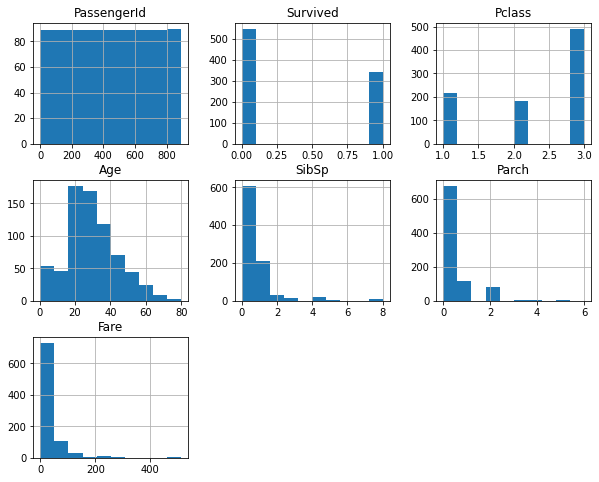

In [11]:
# Histograma com variáveis numéricas
train.hist(figsize=(10,8));



Isso nos ajuda a determinar, entre outros insights iniciais, o quão representativo é o dataset de treinamento do domínio do problema real.

 - Total de amostras 891 ou 40% número real de passageiros que era de 2224 pessoas.;
 - Survived é uma feature categorica com valores 0 ou 1;
 - Cerca de 38%  das pessoas da amsotra sobreviveram, o que representa 32% do sobrevincia real.
 - A maioria dos passageiros (> 75%) não viajou com os pais ou filhos. (terceiro quartiu 0 para estes campos)
 - perto de 30% dos passageiros tem iirmãos ou esposa aborto.
 - As tarifas variaram significativamente com poucos passageiros pagando até $ 512.
 - Poucos passageiros idosos na faixa etária de 65-80 anos.

__Qual é a distribuição das features categóricos?__

In [12]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nasser, Mrs. Nicholas (Adele Achem)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


  - As variaveis __name__ são unicos (não repetem) no dataset (contagem = exclusivo = 891);
  - Variável de __Sex__ como dois valores possíveis com 65% do sexo masculino (topo = masculino, freq = 577 / contagem = 891).
  - Os valores da variavel __cabin__ têm vários dupicates nas amostras. Alternativamente, vários passageiros compartilhavam uma cabine.
  -Embarked assume três valores possíveis. Porto Southampton __"S"__ usado pela maioria dos passageiros (topo = S);
  - Ticket feature tem uma alta proporção (22%) de valores duplicados (único = 681).

## Corelação

##Suposições baseadas na análise de dados

Chegamos às seguintes suposições com base na análise de dados feita até agora. Podemos validar essas suposições ainda mais antes de tomar as medidas adequadas.


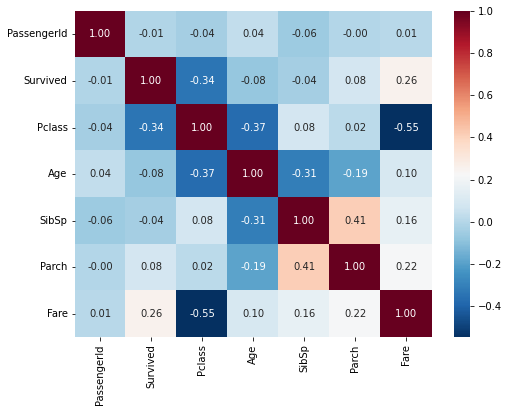

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(train.corr(), fmt=".2f",annot=True,ax=ax  , cmap="RdBu_r")

### Completando dados
  - Podemos querer completar a característica Idade, pois ela está definitivamente relacionada à sobrevivência.
  - Podemos querer completar o recurso Embarked, pois também pode se correlacionar com a sobrevivência ou outro recurso importante.

### Corrigindo dados
 - A feature __Ticket__ pode ser excluído de nossa análise, pois contém uma alta proporção de duplicatas (22%) e pode não haver uma correlação entre o __Ticket__ e a __Survided__.
 - A feature __Cabin__ possuem muitos valores incompletos e nulos em ambos datasets train e test.
 - __PassengerId__ pode ser descartado do Dataset de treinamento, pois não contribui para a feature __Survived__.
 - A feature __name__ é relativamente fora do padrão, pode não contribuir diretamente para a feature __Surviverd__, então pode ser descartado.

### Criando novos campos
  1. Nós podemos querer criar uma nova feature chamado __Family__ baseado em __Parch__ e __SibSp__ para obter a contagem total de membros da família a bordo.
  2. Nós podemos querer reoganizar a feature __name__ para extrair o __Title__ como uma nova feature.
  3. Nós podemos quere criar uma nova feature para Age_bands (faixa etária). Esta retorna um feature numérica continua  numa feature categorica ordinal.
  4. Nós também podemos querer criar uma feature range __Fare__ ,se isso ajudar nosso análise. 

### Classificando
Nós podemos também adicionar suposiçoes baseadas no problema descrito em anotações anteriores.
  1. Mulheres (Sex=female) wram mais propensos a ter sobrevivido.
  2. Crianças (Age <?) eram mais propensos a ter sobrevivido. 
  3. Os passagerios de alta classe "The upper-class passengers" (Pclass = 1) eram mais propensos a ter sobrevivido. 

## Análise para pivotagem de features
Para confirmar algumas das nossas observaçoes e suposiçoes, nós podemos rapitamente analisar nossas features correlacionadas para pivotar um feature contra a outra. Nós podemos somente fazer este estagio para features que não tem nenhum valor vazio. Isso também faz sentido fazer somente para features que são categoricas (__sex__), ordinal (__Pclass__) ou tipos discretos (__SibSo__, __Parch__).
  

In [14]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean(
    ).sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean(
    ).sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean(
    ).sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train[['Parch','Survived']].groupby(['Parch'], as_index=False).mean(
    ).sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- __Pclass:__ Nós observamos correlação signifiativa(>0.5) entre __Pclass__=1 and __Survived__ (classifying #3). Nós decidimos inciur esta feature no nosso modelo.
- __Sex__ Nós confirmamos durante a definição do problema que __Sex=female__ tem teve uam taxa de sobrevivêcnia muito maior __74%__ (classifying #1).
- __SibSp and Parch__ estas features tem zero correlação para determinados valores. pode ser melhor derivar uma feature ou conjunto de features fpara estes features inviduais (creating #1).

## Analise da Visualização de Dados
Agora nós podemos continuar confirmando algumas das nossas suposições usnado visualização para analise de dados.

###Correlacionando recursos numéricos

Vamos começar entendendo as correlações entre as features numéricos e nosso objetivo de solução (__Survived__).

Um gráfico de histograma é útil para analisar variáveis numéricas contínuas como __Age__, onde faixas ou intervalos ajudarão a identificar padrões úteis. O histograma pode indicar a distribuição de amostras usando binarias definidos automaticamente ou faixas igualmente variadas. Isso nos ajuda a responder perguntas relacionadas a faixas específicas (os bebês tiveram melhor taxa de sobrevivência?)

Note que o eixo-__x__ nas visualizações do historgram representa a contagem de amostras ou passageiros.

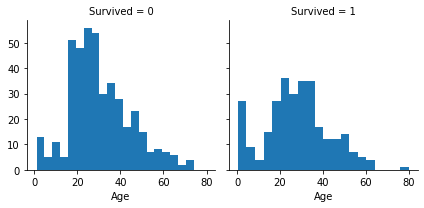

In [18]:
histograma = sns.FacetGrid(train, col='Survived')
histograma.map(plt.hist, 'Age', bins=20)

####__Observations.__

- Bebês (Age <=4) teveram alta taxa de sibrevivência(__survival__).
- Passageiros mais velhos (Age = 80) sobreviveu( __survived__).
- Um grande número de jovens de 15-25 não sobreviiveram (__Survived__).
- A maioris dos passageiros estão na faixa de 13 à 35 anos. 

####__Decisões:__
Essa análise simples confirma nossas suposições como decisões para os estágios subsequentes do fluxo de trabalho.
    - Nós devemos considerar __Age__ (idade) em nosso modelo de treinamento.
    - Completar os valores nulos da feature __Age__(Idade).
    - Nós devemos agrupar por faixa etária (__Age_Band).

### Correlacioando fetaures ordial e númericas

Podemos combinar várias features para identificar correlações usando um único gráfico (plot). Isso pode ser feito com Features numéricos e categóricos que possuem valores numéricos.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


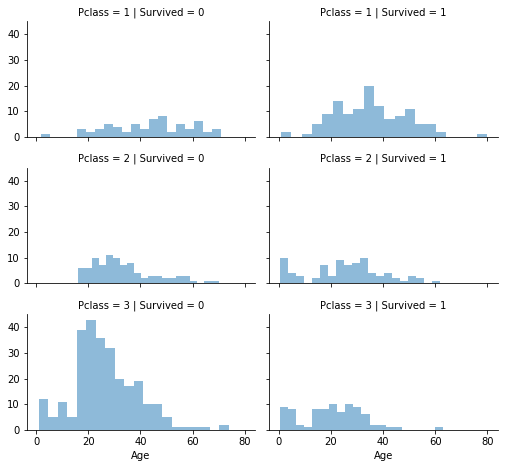

In [19]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2,
                     aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

####Observations
- __Pclass__=3 teve a maior dos passageiros, porem a maior não sobreviveu. Confirma nossa suposição inicial.
- passageiros bebê na __Pclass__=2 e __Pclass__=3 ma maioria sobreviveram. qualifies ainda mais nossa suposicão inciail.
- a maioria dos passageiros na __Pclass__=1 sobreviveram. confirmando nossa nossa suposição inicial.
- Pclass varia intermos da distribuiçao de idade de passageiros

#### **Decisões**
Consider Pclass for model training.

## Correlacionando features Categoricas

Agora nós podemos correlacionar features categoricas com nossa váriavel resposta (target) que é __Survived__. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


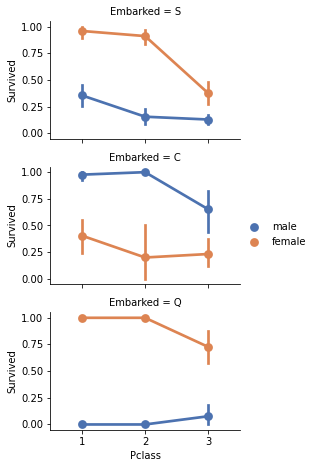

In [20]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette= 'deep')
grid.add_legend();

#### Obeservações

- Passagerios mulher tem uma taxa de sobrevivencia melhor to que homens - Confirms classifying (#1).
*   Com excessão do embaquer=C (__Embarked=C__) onde homens tiveram maior taxa de sobrevivencia. Isso pode ser uma correlação entre __Pclass__ e __Embarked__, por sua vez __Pclass__ ter sobrevivido, não nessariamente um correlação direta entre embarque e Sobrevivêcnia.

*   Homens tiveram melhor taxa de sobrevivêcnia in Pclass = 3, quando comparado com Pclass=2 para os portos Q e S. Completing (#2).

*   OS portos de embarque tem taxa taxas de sobrevivencia variadas para Pclss=3 e entre passageiros homens. Correlating (#1)



#### Decisão

- adcionar Feature Sex ao modelo de trainamento.
- Completar e adicionar embarque ao modelo de trainamento

### Correlating categorical and numerical features
- Nós podemos também querer corelacionar feateares categoricas (com valors não numéricos) e features numericas. Nós podemos considerar correlacionar __Embarked__ (Categoria não-umérica), __Sex__ (Categoria não-numérica), __Fare__ (Numérica Continua), com __Survived__ (Categoria numérica).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


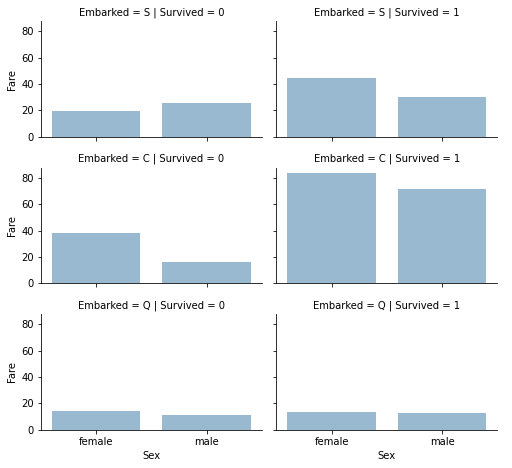

In [23]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend();

#### Observations.

- Passagerios que pagam uma taxa alta, tiveram maior taxa de sobrevivencia. Confirmando nossa suposição para criar faixas de Fare.
- Porto de embarque correlaciona taxa de sobrevivência. Confirma correalção (#1) e complettanod (#2).

#### Decisão

- Considerar faixa de feature faixa_taxa (faixa depreço do ticket)

## Dados Wrangle

Coletamos várias suposições e decisões sobre nossos conjuntos de dados e requisitos de solução. Até agora não tivemos que alterar um único recurso ou valor para chegar a eles. Vamos agora executar nossas decisões e suposições para corrigir, criar e completar metas.

### Correcting by dropping features

- Com base em nossas suposições e decisões, queremos descartar os recursos Cabine (corrigindo # 2) e Ticket (corrigindo # 1).

- Quando aplicável, executamos operações em conjuntos de dados de treinamento e teste juntos para manter a consistência.

In [34]:
print("Antes", train.shape, test.shape, combine[0].shape, combine[1].shape)
train.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
print("Depois", train.shape, test.shape, combine[0].shape, combine[1].shape)

Antes (891, 12) (418, 11) (891, 12) (418, 11)
Depois (891, 10) (418, 9) (891, 10) (418, 9)


### Criar feature nova extraindo de uma exitente

Nós querems analisar se a feature Name pode ser projetada extaindo os títulos e testar a correlação entre Titles and Survivel, antes de excluirmos a features Name e passengerld.

No código a seguir nós extraimos a feature Title usando a expressão regular. A __RegEx__  padrões __(\w+\.)__ corresponde à primeira palavra que termina com um caractere de ponto no recurso Nome. O sinalizador expand = False retorna um DataFrame. 

#### Observations.

Quando plotamos Título, Idade e Sobrevivido, notamos as seguintes observações.

- A maioria dos títulos agrupa grupos de idade com precisão. Por exemplo: Título de mestre tem média de idade de 5 anos.
- A sobrevivência entre as faixas etárias do título varia ligeiramente.
- Certos títulos em sua maioria sobreviveram (Mme, Lady, Sir) ou não (Don, Rev, Jonkheer).


#### Decision.

We decide to retain the new Title feature for model training.

In [43]:
for data in combine:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Nós podemos substituir muitos titulos com a maior combinação de nome ou classifica-las com raras.

In [58]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.444444


Podemos converter os títulos categóricos em ordinais.

In [59]:
title_mapping = {"Mr": 1, "Miss":2, "Mrs": 3, "Master":4, "Rare": 5}

for data in combine:
    data['Title']= data['Title'].map(title_mapping)
    data['Title']= data['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Agora podemos retirar com segurança a feature Name dos datasets de treinamento e teste. Também não precisamos do recurso PassengerId no Dataset de treinamento

In [62]:
train.drop(['Name','PassengerId'], axis=1, inplace=True)

In [64]:
test.drop(['Name'], axis=1, inplace=True)

In [65]:
train.shape, test.shape

((891, 9), (418, 9))

### Convertendo uma feature categorica

Agora podemos converter features que contêm strings em valores numéricos. Isso é exigido pela maioria dos algoritmos de modelo. Isso também nos ajudará a atingir a meta de conclusão o goal.

Vamos começar convertendo o recurso Sexo em uma nova feature chamada Gender, onde female = 1 e male = 0.

In [66]:
sex_mapping = {'female':1, 'male': 0}

for data in combine:
    data['Sex'] = data['Sex'].map(sex_mapping).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
